In [4]:
import numpy as np
import math
import seaborn as sns
import scipy 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import os

In [5]:
P=0.0893869
K2=np.array([239.,265.,291])
i=56.
F1=(1.0385e-7)*P*K2**3
print, F1

(<function print>, array([0.12672844, 0.17274998, 0.22874907]))

In [42]:
P*86400

7723.028160000001

In [6]:
M1=np.arange(0.5,1.41,0.01)
q=np.arange(0.01,1.01,.01)

In [7]:
par = pd.DataFrame(columns=['M1','q','R2','Rl2','A'])

In [8]:
q_M1 = np.zeros(shape=(len(q),len(M1)))

In [12]:
err = 0.055
j=0
for m in M1:
    F11=m*(np.sin(2*math.pi*(i/360.)))**3/(q+1)**2
    q_M1[:,j] = abs(F11 - F1[1])
    j=j+1
    #print(F11[abs(F11-F1) < err])
    #if F11[abs(F11-F1) < err] == True:
    #    new_row = pd.Series({'M1':m,'q':q[abs(F11-F1) < err]})
    #    par = par.append(new_row, ignore_index=True)

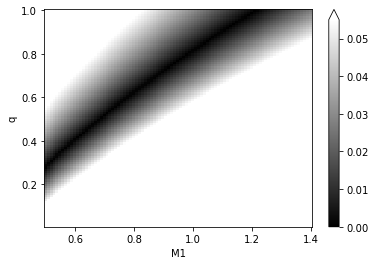

In [13]:
fig, ax = plt.subplots(1, 1)
#norm=colors.LogNorm(vmin=q_M1.min(), vmax=q_M1.max()),
pcm = ax.pcolor(M1, q, q_M1,
                   cmap='gray', shading='nearest', vmin=0., vmax=0.055)
ax.set_xlabel('M1')
ax.set_ylabel('q')
fig.colorbar(pcm, ax=ax, extend='max')

In [14]:
q_s = q[np.where(q_M1<0.055)[0]]
M1_s = M1[np.where(q_M1<0.055)[1]]

In [15]:
G=6.6740831e-11
ae = 1.9885e30
Rsol = 6.9551e8
a=(G*(M1_s+M1_s*q_s)*ae*(P*86400)**2/(4*math.pi**2))**(1./3.)/Rsol
a

array([0.69364437, 0.69570267, 0.70031011, ..., 1.18043991, 1.18328435,
       1.18611519])

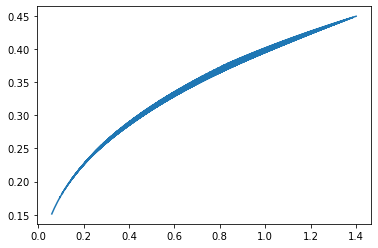

In [38]:
Rl2=a*.49*q_s**(2./3.)/(.6*q_s**(2./3.)+np.log(1+q_s**(1./3.)))
plt.plot(M2_s,Rl2)

In [17]:
M2_s=M1_s*q_s
M2_s

array([0.06  , 0.065 , 0.0663, ..., 1.38  , 1.39  , 1.4   ])

In [18]:
M2=np.array([0.16,0.20,0.25,0.3,0.35,0.4])
R2=np.array([1.3506400000e+10,1.5829100000e+10,1.8583900000e+10,2.1276200000e+10,2.4502900000e+10,2.7400800000e+10])

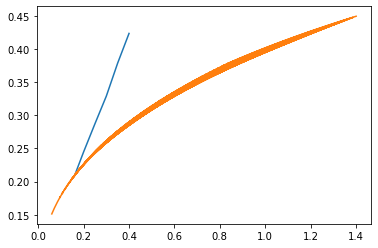

In [19]:
plt.plot(M2,R2/Rsol/100*1.075)
plt.plot(M2_s,Rl2)

In [41]:
M1_s[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].mean(), M1_s[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].std(), q_s[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.1].mean(), M2_s[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].mean()

(0.5606542056074767,
 0.040586149933505865,
 0.4667541229385308,
 0.16099158878504674)

In [35]:
Rl2[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].mean(), Rl2[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].std()
a[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].mean(), a[abs(Rl2-R2[0]/Rsol/100*1.075) < 0.01].std()

(0.7545044026204809, 0.015653045019660014)

In [353]:
DIR=os.chdir('c:/Users/gamak/Documents/Papers/MT_Dra/VAR_ROT0.00_SH_Z0.017_Y0.279/')
files=os.listdir(DIR)